# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy.
    3. If the SPY closes at a X-day high, sell your long position.
    
    (optimize for number of days)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(2005, 12, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
periods = range(2, 16)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].get_stats()

2 3 4 5 6 7 8 9 10 11 12 13 14 15 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,2,3,4,5,6,7,8,9,10,11,12,13,14,15
annual_return_rate,6.86,6.15,9.80,8.84,5.10,9.46,9.82,7.36,4.02,2.32,2.58,2.25,1.14,2.57
max_closed_out_drawdown,-32.95,-43.41,-26.36,-21.90,-29.48,-24.83,-31.73,-47.27,-48.60,-47.72,-48.24,-44.41,-58.97,-57.40
drawdown_annualized_return,-4.80,-7.06,-2.69,-2.48,-5.78,-2.63,-3.23,-6.42,-12.08,-20.56,-18.69,-19.72,-51.85,-22.35
drawdown_recovery,-0.48,-2.87,-0.46,-0.18,-1.31,-0.06,-3.75,-3.84,-3.55,-3.52,-3.52,-3.52,-3.52,-3.52
best_month,28.47,30.94,29.30,27.86,27.32,20.67,20.67,20.16,19.24,22.86,19.25,18.44,17.89,17.92
worst_month,-18.05,-21.99,-16.52,-16.52,-16.43,-18.82,-18.81,-21.75,-21.73,-21.70,-21.70,-21.73,-21.71,-21.74
sharpe_ratio,0.43,0.40,0.58,0.55,0.37,0.58,0.60,0.48,0.31,0.22,0.24,0.22,0.15,0.24
sortino_ratio,0.39,0.37,0.52,0.47,0.29,0.46,0.46,0.36,0.24,0.17,0.18,0.17,0.12,0.20
monthly_std,5.13,5.58,5.01,4.63,4.02,3.96,4.14,4.18,4.33,4.13,3.99,3.79,4.04,4.11
pct_time_in_market,28.40,29.03,28.61,26.73,24.45,24.81,24.15,24.93,26.85,25.59,25.62,24.87,27.21,27.21


Bar graphs

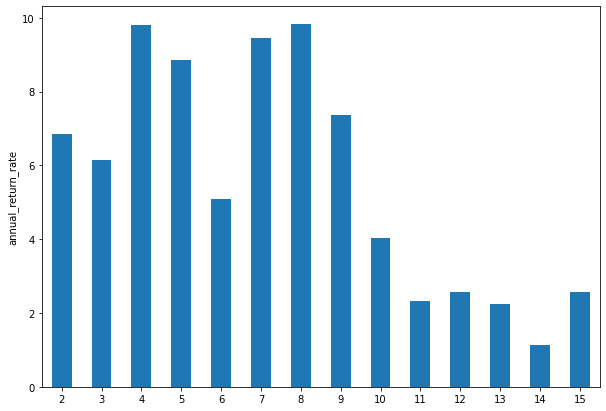

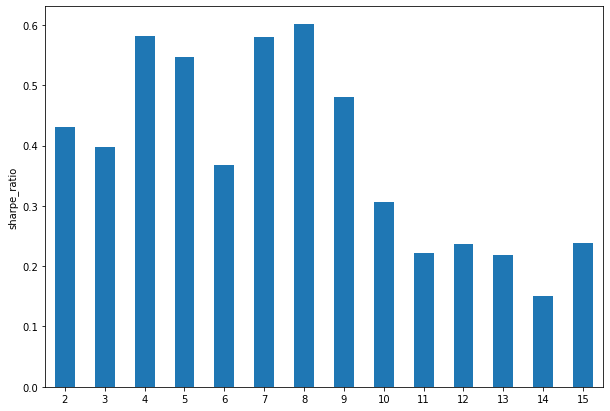

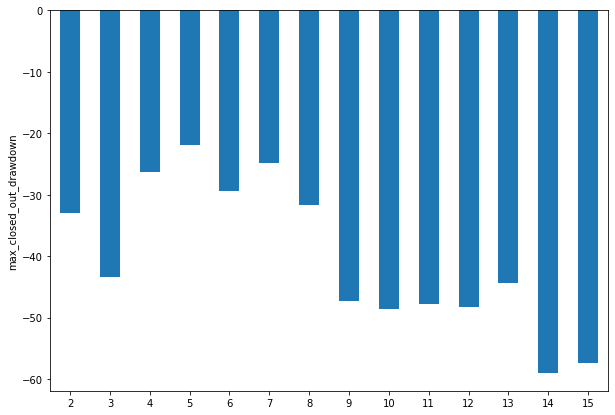

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2007-03-08 00:00:00 BUY  260 GDX @ 38.35
2020-06-12 00:00:00 SELL 260 GDX @ 32.64


Equity curve

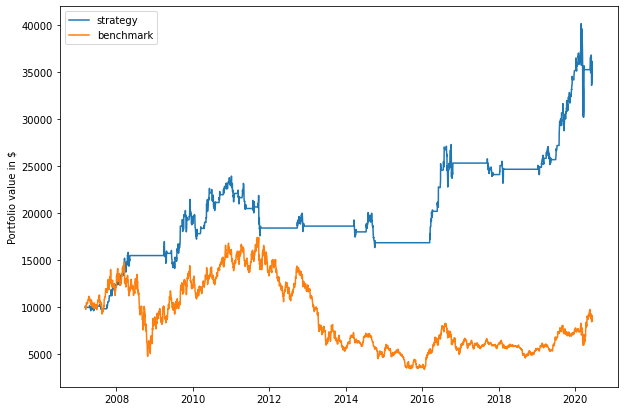

In [9]:
pf.plot_equity_curve(strategies['8'].dbal, benchmark=benchmark.dbal)